In [5]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from numpy import asarray as npa
from matplotlib import pyplot as plt
%matplotlib inline

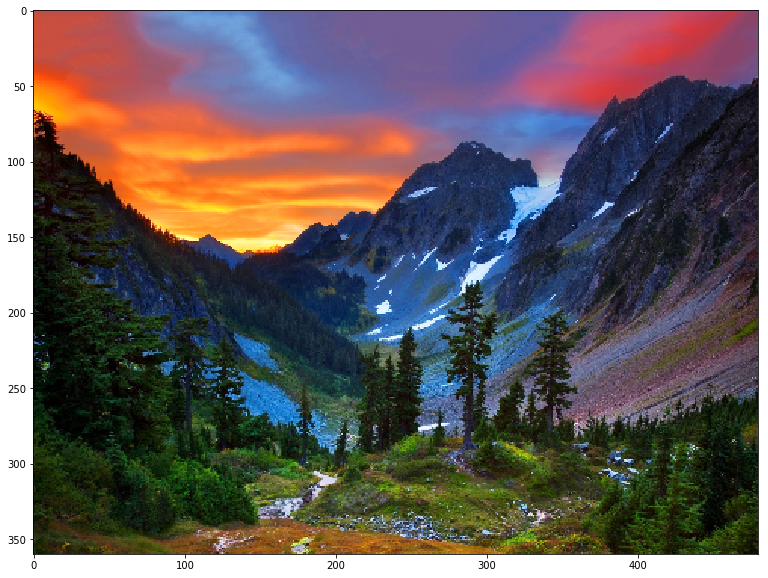

In [141]:
im = cv2.imread("./im2.jpg")
im = cv2.resize(im,(480,360))
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.figure(0,figsize=(20,10))
plt.imshow(im)
plt.show()

In [142]:
imarr = im.reshape((im.shape[0]*im.shape[1],im.shape[2]))
print imarr.shape

(172800, 3)


In [143]:
km = KMeans(n_clusters=5)
km.fit(imarr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [144]:
color = 255 - km.cluster_centers_.astype("uint8")
dcarr = np.zeros((imarr.shape))
for ix in range(imarr.shape[0]):
    dcarr[ix,:] = color[km.labels_[ix]]

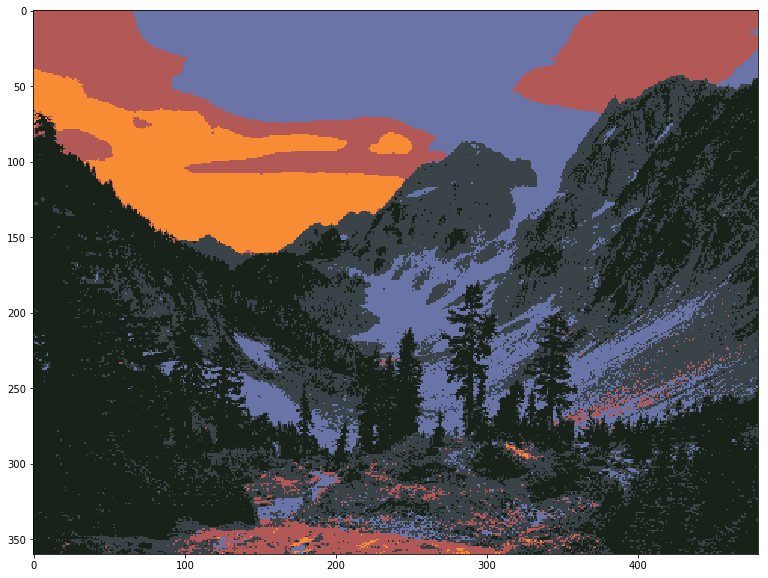

In [145]:
dcimg = dcarr.reshape((im.shape))
plt.figure(1,figsize=(20,10))
plt.imshow(dcimg)

In [146]:
def cost(x,y):
    return np.sqrt(((x-y)**2).sum())

def createDict(k, xt=None, centers=None):
    #If we're already given a numpy array of centers, create a dictionary of those centers 
    if type(centers) != type(None):
        C = []
        for kx in range(k):
            cluster = {
                        'center': centers[kx],
                        'points': []
                      } 
            C.append(cluster)
        return C
    
    
    #Else create a dictionary within the range of max and min of xt
    C = []
    minv, maxv = xt.min(), xt.max()
    centers = np.random.uniform(low = minv, high = maxv, size = (k,xt.shape[1]))
    for kx in range(k):
        cluster = {
                    'center':centers[kx,:],
                    'points':[]
                  } 
        C.append(cluster)
    return C

def kmeans(k,xt,centers=None, itn=9, toPlot = False):
    C = createDict(k,xt,centers)
    lab = []
    
    for it in range(itn):        
    
        #Put points in clusters
        for point in xt:
            minv = float('INF')
            kc = -1
            for kx in range(k):
                dist = cost(point,C[kx]['center'])
                if dist < minv:
                    minv = dist
                    kc = kx
            C[kc]['points'].append(point)
            if it == itn-1:
                lab.append(kc)
        
        if it == itn-1:
            break
        
        if toPlot == True:
            plot(k,C,it)
        
        #Shift centers to mean of points
        for kx in range(k):
            pts = npa(C[kx]['points'])
            if len(pts) == 0:
                pass
            else:
                mean = pts.mean(axis=0)
                C[kx]['center'] = mean
                C[kx]['points'] = []
    return C, npa(lab)

In [147]:
k=3
mkmc,mkml = kmeans(k,imarr)

In [148]:
colors = []
for ix in range(k):
    colors.append(255 - mkmc[ix]['center'].astype(int))
colors = npa(colors)

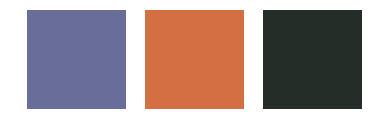

In [149]:
plt.figure(3)
for cols in range(colors.shape[0]):
    cl = np.zeros((20, 20, 3))
    cl[:, :, :] = colors[cols]
    plt.subplot(1, k, cols+1)
    plt.axis("off")
    plt.imshow(cl)
plt.show()

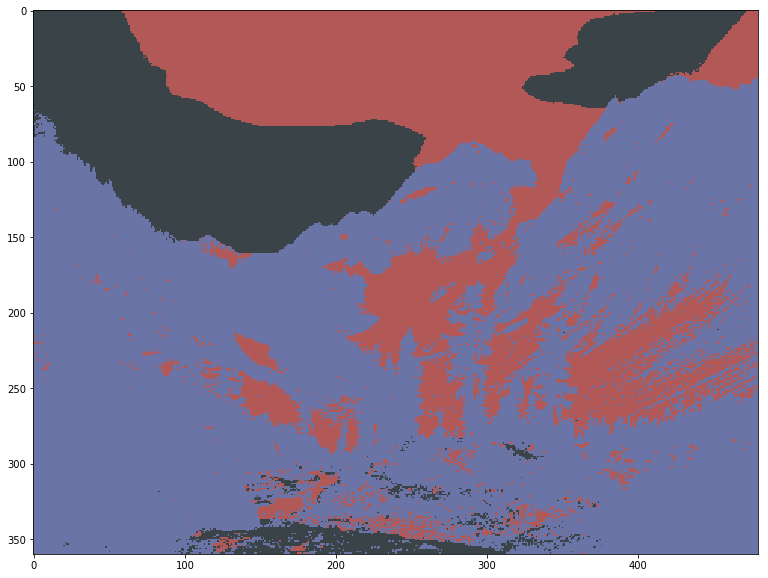

In [150]:
dcarr = np.zeros((imarr.shape))
for ix in range(imarr.shape[0]):
    dcarr[ix,:] = color[mkml[ix]]
dcimg = dcarr.reshape((im.shape))
plt.figure(1,figsize=(20,10))
plt.imshow(dcimg)

In [153]:
p=0.01
i=1
entropy = []
xaxis = []
while p<=0.99:
    xaxis.append(i)
    entropy.append(p*np.log2(p) + (1-p)*(np.log2(1-p)))
    i+=1
    p+=0.01

here


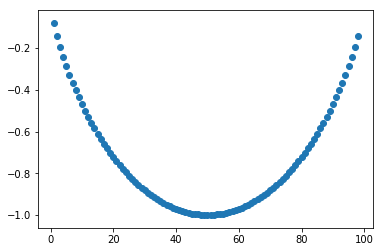

In [154]:
plt.scatter(xaxis[:],entropy[:])
print "here"